In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from data_utils import load_CIFAR10
from BP_Network_Relu import BPNetWork

In [2]:
def pre_dataset():
    cifar10_dir = 'D:/dataset/cifar-10-python/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    #像素去均值化
    X_train = X_train - np.mean(X_train,axis=0)
    X_test = X_test - np.mean(X_test,axis=0)
    
    num_train = 20000
    num_test = 2000
    X_train = X_train[:num_train]
    y_train = y_train[:num_train]
    X_test = X_test[:num_test]
    y_test = y_test[:num_test]
    
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    # add a parameter for W
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = pre_dataset()

D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_1
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_2
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_3
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_4
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_5
D:/dataset/cifar-10-python/cifar-10-batches-py\test_batch


Iteration 0 / 5000, learning rate 0.000005 , loss 690.067868
Iteration 500 / 5000, learning rate 0.000005 , loss 475.689450
Iteration 1000 / 5000, learning rate 0.000003 , loss 391.728836
Iteration 1500 / 5000, learning rate 0.000003 , loss 314.227652
Iteration 2000 / 5000, learning rate 0.000001 , loss 302.804300
Iteration 2500 / 5000, learning rate 0.000001 , loss 264.692976
Iteration 3000 / 5000, learning rate 0.000001 , loss 254.584756
Iteration 3500 / 5000, learning rate 0.000001 , loss 262.827517
Iteration 4000 / 5000, learning rate 0.000000 , loss 234.858412
Iteration 4500 / 5000, learning rate 0.000000 , loss 227.791427


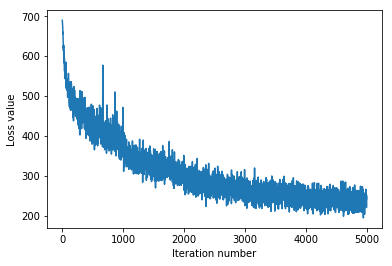

In [4]:
bp_network = BPNetWork()
bp_network.train(X_train,y_train,learning_rate=0.00001,batch_num=300,num_iter=5000,
                 reg=1,num_hidden_layer=50)

In [5]:
#accuracy in train dataset and test dataset
y_pred = bp_network.predict(X_test)
print('acc in testSet:',np.mean(y_pred == y_test))

y_pred = bp_network.predict(X_train)
print('acc in trainSet:',np.mean(y_pred == y_train))

acc in testSet: 0.4705
acc in trainSet: 0.74725


#### 使用relu作为激活函数后，Loss值下降的非常快，在训练集上准确率非常高